In [ ]:
#From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.
'''
Finding the optimum no. of clusters in k-means clustering

MEthods:
1. Direct 
- Withing cluster sum of squares or average silhoutte
- Elbow and Silhoute Methods
2. Statistical Testing Method
- Comparing Evidence against Null Hypothesis

#Elbow Method
-basic idea behind partitioning methods, such as k-means clustering
-is to define clusters such that the total intra-cluster variation 
[or total within-cluster sum of square (WSS)] is minimized.

# Compute clustering algorithm (e.g., k-means clustering) for different values of k. For instance, by varying k from 1 to 10 clusters.
# For each k, calculate the total within-cluster sum of square (wss).
# Plot the curve of wss according to the number of clusters k.
# The location of a bend (knee) in the plot is generally considered as an indicator of the appropriate number of clusters.

'''

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("dark_background")
from sklearn.cluster import KMeans
from sklearn import metrics
import seaborn

In [7]:
def get_data():
    data_frame=pd.read_csv("/content/Iris.csv")
    return data_frame

In [8]:
data_frame=get_data()
data_frame

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [15]:
def PlotHeatMap(data_frame):
    seaborn.heatmap(data_frame.corr(),annot=True,cmap="Spectral")
    plt.show()

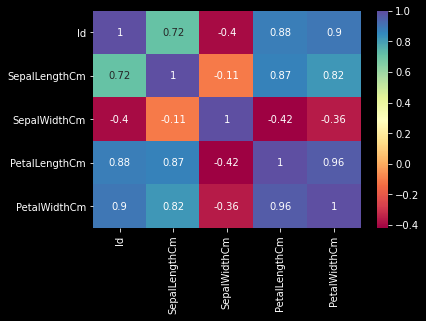

In [16]:
#Printing the Correlation Matrix(Heat Map)
PlotHeatMap(data_frame)

In [17]:
def pre_process_data(data_frame):
    #removing the null values and removing the duplicates
    data_frame=data_frame.dropna().drop_duplicates()
    x_data=data_frame.values[:,:-1]
    y_data=data_frame.values[:,-1].reshape(data_frame.values[:,-1].shape[0],1)
    #train-test split to prevent the over and underfitting of model
    return x_data,y_data

In [18]:
x_data,y_data=pre_process_data(data_frame)
x_data.shape,y_data.shape

((150, 5), (150, 1))

In [19]:
def Optimum_K_Elbow_Method(x_data,k_initial,k_final):
    #within-cluster sum of square -wcss
    wcss=[]
    for kval in range(k_initial,k_final):
        kmeans=KMeans(n_clusters=kval,random_state=0)
        #We use the default values for restof the parameters
        kmeans.fit(x_data)
        # kmeans.inertia_ returns the sum of the squared distances of the samples to their closest cluster centres
        wcss.append(kmeans.inertia_)
    return wcss

In [20]:
k_initial=1
k_final=11
wcss = Optimum_K_Elbow_Method(x_data,k_initial,k_final)

In [21]:
def num_clusters_versus_wcss(k_initial,k_final,wcss):
    plt.title("No. of Clusters Versus WCSS")
    plt.xlabel("No. of Clusters")
    plt.ylabel("WCSS")
    plt.plot(range(k_initial,k_final),wcss)
    plt.show()    

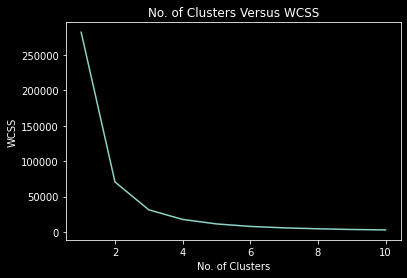

In [22]:
num_clusters_versus_wcss(k_initial,k_final,wcss)

In [23]:
# the elbow occurr at around when No. of Clusters = 3
# After k=3, the no. of clusters does not decrease significantly
kmeans=KMeans(n_clusters=3,random_state=0)
y_pred=kmeans.fit_predict(x_data)
print(y_pred)
print(kmeans.cluster_centers_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
[[125.5     6.588   2.974   5.552   2.026]
 [ 25.5     5.006   3.418   1.464   0.244]
 [ 75.5     5.936   2.77    4.26    1.326]]


In [25]:
def Visualize_Clusters(x_test,y_pred):
    #plot for Iris-setosa in 2D
    plt.scatter(x_test[y_pred==0,0],x_test[y_pred==0,1],c='blue',label='Iris-setosa')
    #plot for Iris-versicolour
    plt.scatter(x_test[y_pred==1,0],x_test[y_pred==1,1],c='orange',label='Iris-versicolour')
    #plot for Iris-virginica
    plt.scatter(x_test[y_pred==2,0],x_test[y_pred==2,1],c='pink',label='Iris-virginica')
    #plt.cluster_centers_
    plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='white',marker='P',s=90,label='Cluster Centroids')
    plt.show()

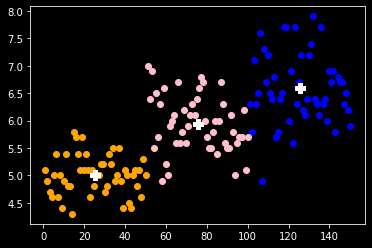

In [26]:
Visualize_Clusters(x_data,y_pred)